# Compare results of CNN, MST+CNN and SMel+CNN (Figure 7)

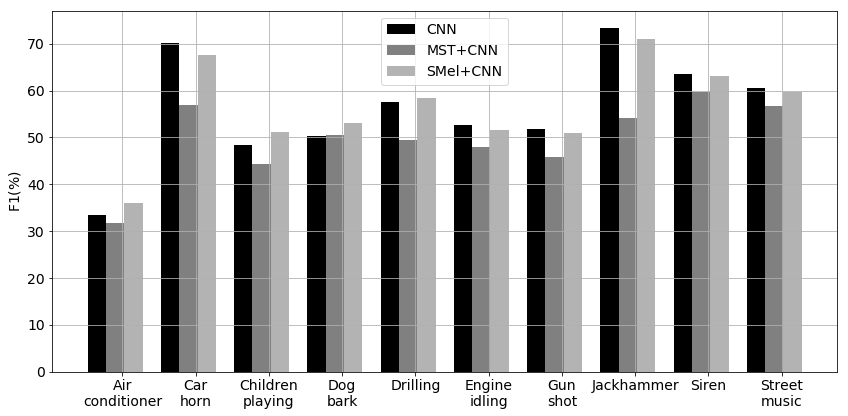

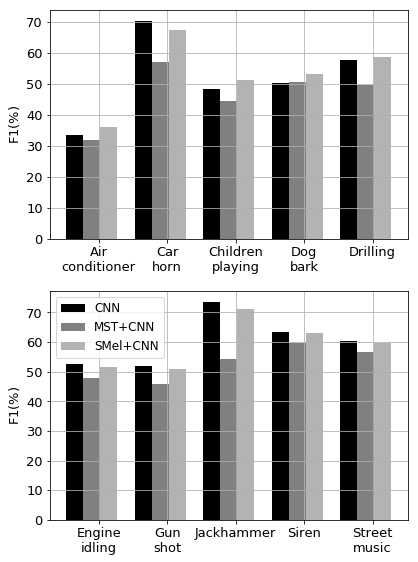

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import sys
import os

from matplotlib import rc
font = {'family' : 'sans-serif',
        'size'   : 14}

rc('font', **font)
sys.path.insert(0,'../..')
from sed_endtoend.callbacks import ER,F1

label_list = (['Air\nconditioner', 'Car\nhorn', 'Children\nplaying',
               'Dog\nbark', 'Drilling', 'Engine\nidling', 'Gun\nshot',
               'Jackhammer', 'Siren', 'Street\nmusic'])         

cnn_folder = "../04_CNN_baseline"
mst_folder = "../05_MST_CNN"
smel_folder = "../06_SMel_CNN"

y_cnn = np.load(os.path.join(cnn_folder,'y_test.npy'))
y_p_cnn = np.load(os.path.join(cnn_folder,'y_test_predict.npy'))

y_mst = np.load(os.path.join(mst_folder,'y_test.npy'))
y_p_mst = np.load(os.path.join(mst_folder,'y_test_predict.npy'))

y_smel = np.load(os.path.join(smel_folder,'y_test.npy'))
y_p_smel = np.load(os.path.join(smel_folder,'y_test_predict.npy'))

F1_cnn = np.zeros(len(label_list))
F1_mst = np.zeros(len(label_list))
F1_smel = np.zeros(len(label_list))

for c in range(len(label_list)):
    F1_cnn[c] = F1(y_cnn[:,c],y_p_cnn[:,c])
    F1_mst[c] = F1(y_mst[:,c],y_p_mst[:,c])
    F1_smel[c] = F1(y_smel[:,c],y_p_smel[:,c])

plt.figure(figsize=(12,6))
#plt.title('F1 per class for each model on test set')
c1 = [10,10,10,1]

plt.bar(np.arange(len(label_list))-0.25, 100*F1_cnn, width=0.25, tick_label=label_list, label='CNN',color=[0,0,0])
plt.bar(np.arange(len(label_list)), 100*F1_mst, width=0.25, tick_label=label_list, label='MST+CNN',color=[0.5,0.5,0.5])
plt.bar(np.arange(len(label_list))+0.25, 100*F1_smel, width=0.25, tick_label=label_list, label='SMel+CNN',color=[0.7,0.7,0.7])
plt.xticks(np.arange(len(label_list))+0.1,label_list)
plt.ylabel('F1($\%$)')
plt.legend(loc='upper center')
#ax2.bar(np.arange(len(list_total1))+0.2, totalEER1, width=0.2,color=c3, tick_label=list_total1, label='EER')
plt.grid()
plt.tight_layout()
plt.savefig("results_classes.eps")
plt.show()

font = {'family' : 'sans-serif',
        'size'   : 13}

rc('font', **font)

#plt.figure(figsize=(6,8))
#plt.title('F1 per class for each model on test set')
#plt.subplot(2,1,1)
#plt.bar(np.arange(len(label_list[:5]))-0.25, 100*F1_cnn[:5], width=0.25, tick_label=label_list[:5], label='CNN',color=[0,0,0])
#plt.bar(np.arange(len(label_list[:5])), 100*F1_mst[:5], width=0.25, tick_label=label_list[:5], label='MST+CNN',color=[0.5,0.5,0.5])
#plt.bar(np.arange(len(label_list[:5]))+0.25, 100*F1_smel[:5], width=0.25, tick_label=label_list[:5], label='SMel+CNN',color=[0.7,0.7,0.7])
#plt.xticks(np.arange(len(label_list[:5]))+0.1,label_list[:5])
#plt.ylabel('F1($\%$)')

#plt.grid()
#plt.subplot(2,1,2)
#plt.bar(np.arange(len(label_list[5:]))-0.25, 100*F1_cnn[5:], width=0.25, tick_label=label_list[5:], label='CNN',color=[0,0,0])
#plt.bar(np.arange(len(label_list[5:])), 100*F1_mst[5:], width=0.25, tick_label=label_list[5:], label='MST+CNN',color=[0.5,0.5,0.5])
#plt.bar(np.arange(len(label_list[5:]))+0.25, 100*F1_smel[5:], width=0.25, tick_label=label_list[5:], label='SMel+CNN',color=[0.7,0.7,0.7])
#plt.xticks(np.arange(len(label_list[5:]))+0.1,label_list[5:])
#plt.legend(loc='upper left',fontsize=12)
#plt.ylabel('F1($\%$)')
#plt.grid()
#plt.tight_layout()
#plt.savefig("results_classes2.eps")
#plt.show()
